In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft

def plot_func(x, y, label, title, xlab, ylab):

    plt.figure(figsize = (20, 10))
    plt.plot(t, y, label = label )
    plt.title(title, fontsize = 30)
    plt.xlabel(xlab, fontsize = 30)
    plt.ylabel(ylab, fontsize = 30)
    plt.legend(loc = 'best', fontsize = 30)
    plt.grid(True)
    plt.show()

def fft_func(y, f_s):
    
    freqs = fft.fftshift(fft.fftfreq(y.size, 1 / f_s))
    Y = fft.fftshift(fft.fft(y))
    
    return freqs, Y

def phase_func(Y):
    
    phases = np.angle(Y) * 180 / np.pi
    
    return phases

def get_phase_at_f(freqs, Y, f, threshold):

    Y2 = Y
    Y2[np.abs(Y) < threshold] = 0
    phases2 = np.angle(Y2) * 180 / np.pi
        
    p = np.angle(Y2[np.isin(freqs, f)], deg = True)
    return p, phases2

In [2]:
A = 0.5
freq = 10
phase = 20
phi = phase * np.pi/180

f_s = 32*freq


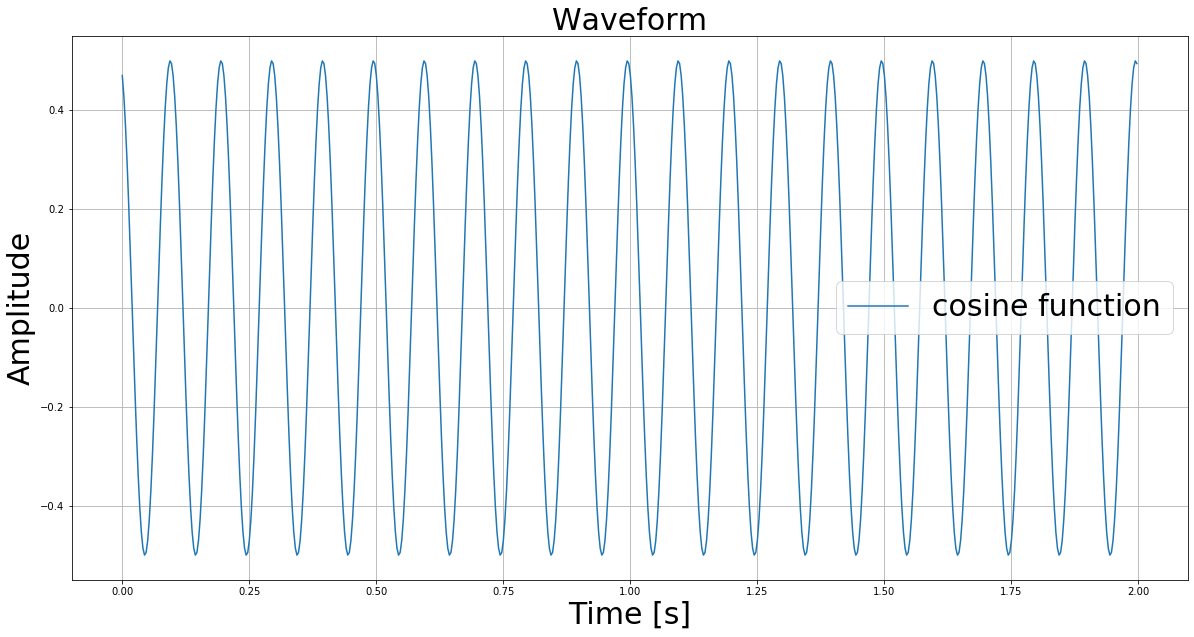

In [3]:
t = np.arange(0, 2, 1/f_s) #start, stop, step
y = A * np.cos(2 * np.pi * freq * t + phi)

plot_func(t, y, 'cosine function', 'Waveform', 'Time [s]', 'Amplitude')

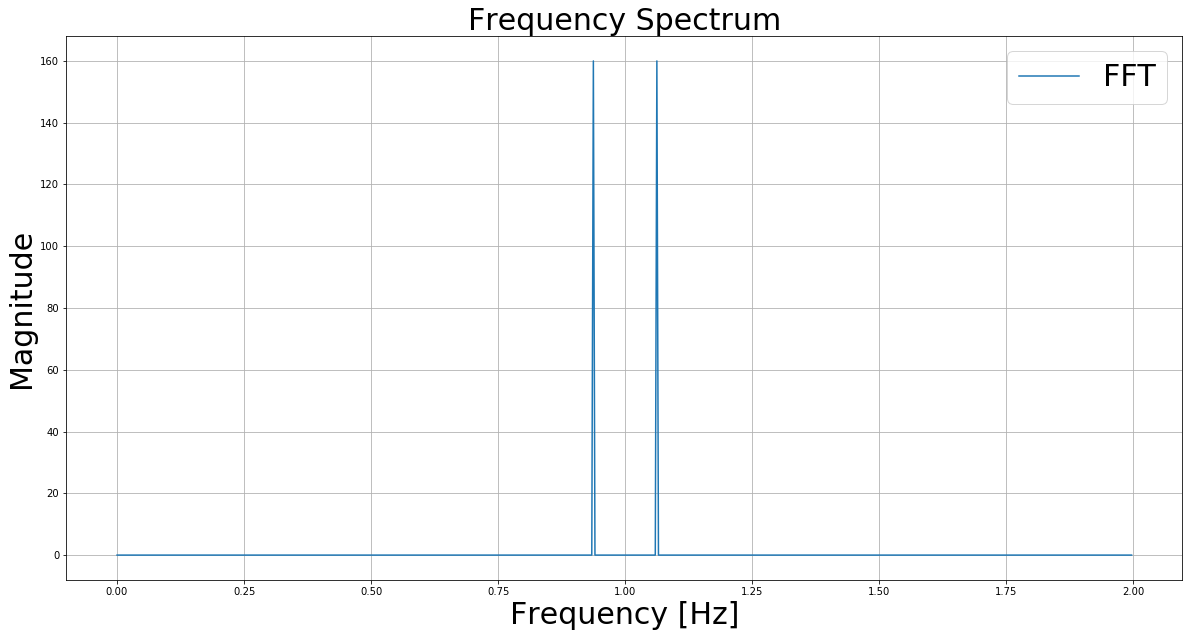

In [4]:
freqs, Y = fft_func(y, f_s)

plot_func(freqs, np.abs(Y), 'FFT', 'Frequency Spectrum', 'Frequency [Hz]', 'Magnitude')

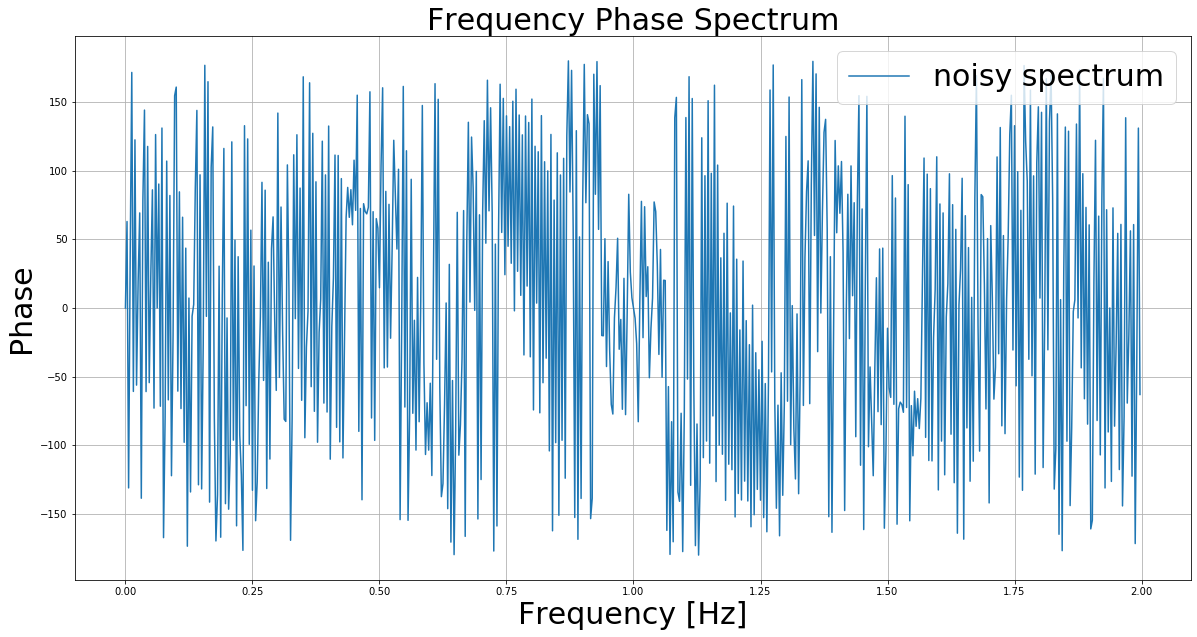

In [5]:
phases = phase_func(Y)

plot_func(freqs, phases, 'noisy spectrum', 'Frequency Phase Spectrum', 'Frequency [Hz]', 'Phase')

[-10.  10.]
[-20.  20.]


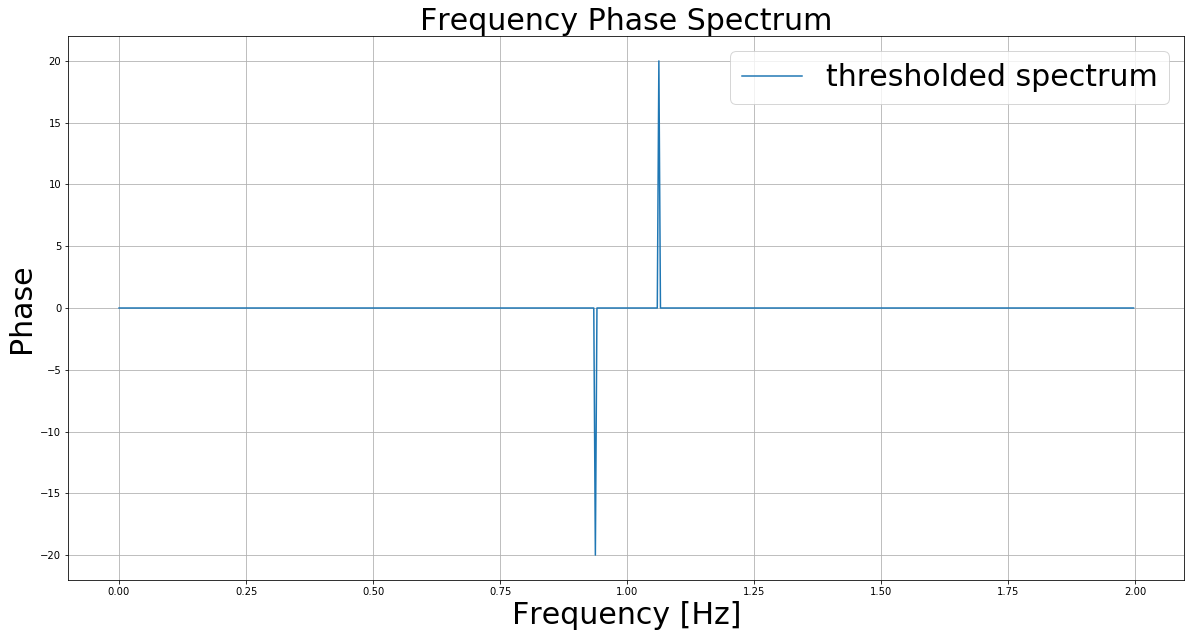

In [6]:
noise_freqs = freqs[np.abs(Y) == np.max(np.abs(Y))]
print(noise_freqs)
threshold = np.max(np.abs(Y))/100

p, phases2 = get_phase_at_f(freqs, Y, noise_freqs, threshold)
print(p)

plot_func(freqs, phases2, 'thresholded spectrum', 'Frequency Phase Spectrum', 'Frequency [Hz]', 'Phase')
